In [2]:
import pandas as pd
data=pd.read_csv('Book1.csv')

In [3]:
data.head(5)

,Weather,Temp,Play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


In [5]:
data.isnull().sum()
data.fillna(data.mean(numeric_only=True), inplace=True)
data.isnull().sum()

Weather    0
Temp       0
Play       0
dtype: int64

In [7]:
X=data.drop('Play', axis =1)
y=data['Play']

In [13]:
X= pd.get_dummies(X, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y=le.fit_transform(y)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [25]:
new_instance =pd.DataFrame({
    'Weather':['Overcast'],
    'Temp':['Mild']
})

new_instance_encode=pd.get_dummies(new_instance)
new_instance_encode= new_instance_encode.reindex(columns=X_train.columns,fill_value=0)
predict_new_instance_encode= model.predict(new_instance_encode)
class_pro = model.predict_proba(new_instance_encode)

print("Predicted class:", 'Yes' if predict_new_instance_encode[0] == 1 else 'No')
print("Class probabilities [No, Yes]:", class_pro)

Predicted class: Yes
Class probabilities [No, Yes]: [[3.39368361e-05 9.99966063e-01 0.00000000e+00]]


Accuracy:  0.2
F1 score:   <function f1_score at 0x000001F877128AE0>


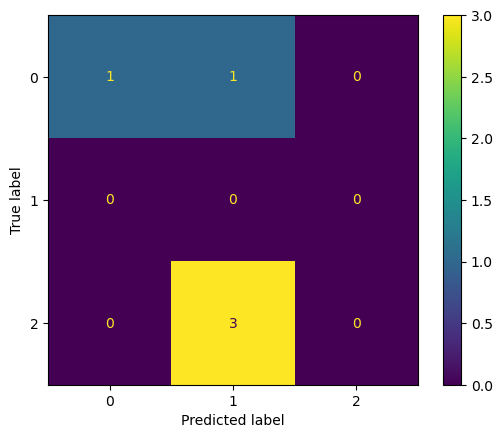

In [26]:

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = 'weighted')

print('Accuracy: ',accuracy)
print('F1 score:  ',f1_score)

import matplotlib.pyplot as plt
cm= confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()